## **CYBR7240 Assignment 6**
#### Jermaine Cameron
#### April 28, 2021


### **Part 1: Process the data. The following steps will be completed first:**

###    - Read in the CSV file and convert to arrays.
###    - Split dataset into the input features and the label.
###    - Scale data so that the input features have similar orders of magnitude.
###    - Split dataset into the training set, the validation set and the test set.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


### **Part 2: Building and Training the Neural Network. The following steps will be completed next:**
### - Set up the architecture.
### - Train and evaluate the model.

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6695 - accuracy: 0.5137 - val_loss: 0.6881 - val_accuracy: 0.4521
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5137 - val_loss: 0.6802 - val_accuracy: 0.4521
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.5147 - val_loss: 0.6737 - val_accuracy: 0.4521
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.5147 - val_loss: 0.6679 - val_accuracy: 0.4521
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.5274 - val_loss: 0.6630 - val_accuracy: 0.4658
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.5382 - val_loss: 0.6579 - val_accuracy: 0.4886
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.6008 - val_loss: 0.6532 - val_accuracy: 0.5525
Epoch 8/100
3

In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 0s/step - loss: 0.2437 - accuracy: 0.8995


0.8995434045791626

### **Part 3: Visualize Loss and Accuracy. The following step will be completed next:**
### - Use matplotlib to visualize loss and accuracy


In [20]:
import matplotlib.pyplot as plt

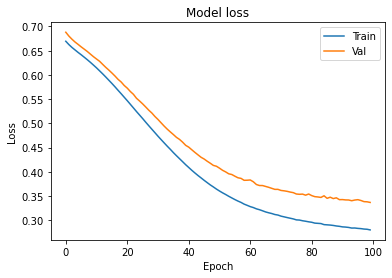

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

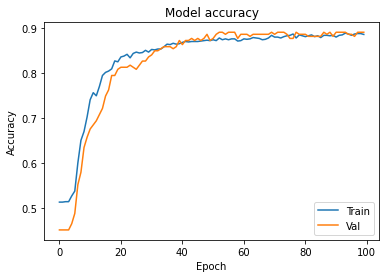

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### **Part 4: Add Regularization to Neural Network. The following step will be completed last:**
### - Form a second neural network (model_2) that will badly overfit training set.
### - Incorporate L2 regularization and dropout into a third model (model_3) to reduce overfitting.


In [24]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4734 - accuracy: 0.7642 - val_loss: 0.4692 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3368 - accuracy: 0.8620 - val_loss: 0.3751 - val_accuracy: 0.8356
Epoch 3/100
32/32 [==============================] - 1s 19ms/step - loss: 0.3168 - accuracy: 0.8650 - val_loss: 0.3397 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2921 - accuracy: 0.8728 - val_loss: 0.3691 - val_accuracy: 0.8402
Epoch 5/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2930 - accuracy: 0.8757 - val_loss: 0.3307 - val_accuracy: 0.8539
Epoch 6/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2475 - accuracy: 0.8982 - val_loss: 0.3755 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2513 - accuracy: 0.8904 - val_loss: 0.3242 - val_accuracy: 0.8630
Epoch 

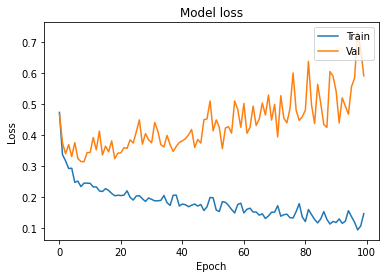

In [25]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

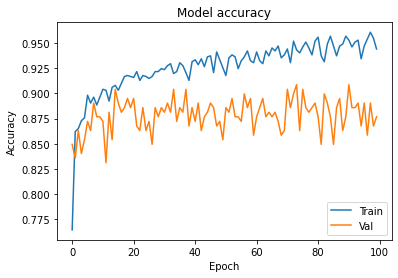

In [26]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
from keras.layers import Dropout
from keras import regularizers

In [28]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [29]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 32ms/step - loss: 14.2225 - accuracy: 0.5949 - val_loss: 3.9094 - val_accuracy: 0.7808
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 1.6704 - accuracy: 0.8249 - val_loss: 0.7139 - val_accuracy: 0.8311
Epoch 3/100
32/32 [==============================] - 1s 28ms/step - loss: 0.5532 - accuracy: 0.8679 - val_loss: 0.5342 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 1s 27ms/step - loss: 0.5231 - accuracy: 0.8591 - val_loss: 0.5429 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 27ms/step - loss: 0.4990 - accuracy: 0.8591 - val_loss: 0.5612 - val_accuracy: 0.8128
Epoch 6/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4805 - accuracy: 0.8699 - val_loss: 0.4861 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4655 - accuracy: 0.8777 - val_loss: 0.6462 - val_accuracy: 0.7945
Epoch

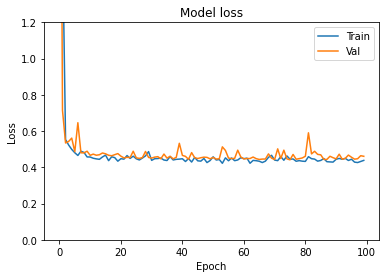

In [30]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

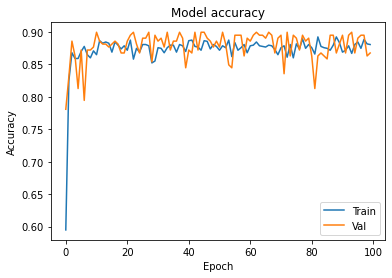

In [31]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()